In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time


df1 = pd.read_csv('loans_full_schema.csv')

pd.options.display.max_columns = None

df1.head(15)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

#### 
Machine learning (ML) is the study of computer algorithms that improve automatically through experience and by the use of data. It builds a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.

Machine learning can be characterized as the creation and application of algorithms that learn from data and the algorithms construct a trained model to reflect the input data. Machine learning is applying statistical or computer science methods on data to draw causal insights, predict future events and to understand patterns. 

In order to use machine learning we have to have lot of ground data to work with but very little obvious correlation of the elements that produce a ground data. In other word if you have enough data available but we can not see any patterns in the data then we can not make any conclusion from the data and thus we can not train ML model using the data. So we have enough ground data that we can use and analyse for any pattern and predict and train ML model on. If you have model with similar data then it takes more time and more data to see any pattern in them. So we can use machine learning if we have enough data with some pattern in them and then we can learn the pattern and train the ML model and make it generalised to predict future events. If we can not find useful pattern then the data is not useful for ML. 

Secondly, the pattern must be relevant for the future situation. For instance if you train ML using past data and made ML algorithm and now situation for the future data change and we might not have similar condition for data. you can think this as ML created using data without pandemic effect and when we predict using ML in pandemic situation we might not get accurate prediction because we did not generalised ML for odd situations like pandemic. So your ML should be able to generalised to new or odd situations in order to be successful.

So Machine learning not make sense, When you have very little data and ground truth. If you don’t have enough data for the program to train on, it is unlikely that it will be able to generalize the features needed to be successful. Secondly if you have enough data but can not conclude any pattern then it is useless for ML. 

To conclude, we have to have enough useful available data in which we can see pattern or draw out some insights so we can train our model on and make some good generalised algorithm which we can apply to any future situation. In contrast we can not build any ML if we do not have enough data or enough data without any pattern.




### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.  

In [66]:
df1.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

#### step 1. Removing extra spaces from column names using str.replace() method.



In [67]:
df1.columns = df1.columns.str.replace(" ","")
df1

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,0,NaN,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### step 2. replacing some columns with null values to 0 using fillna(0) method.

In [68]:
df1[['annual_income_joint','debt_to_income_joint','months_since_90d_late','months_since_last_delinq']] = df1[['annual_income_joint','debt_to_income_joint','months_since_90d_late','months_since_last_delinq']].fillna(0)
df1

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,NaN,0.00,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,NaN,0.00,0,0.0,1996,1,30,14,28800,4321,0,1,0.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,NaN,0.00,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,NaN,0.00,0,0.0,2007,0,4,4,25400,4997,0,1,0.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,0.0,2008,7,22,16,69839,52722,0,0,0.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0.0,NaN,0.00,0,0.0,2008,5,44,13,199195,77963,0,1,0.0,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,0.0,NaN,0.00,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,0,0.0,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0.0,NaN,0.00,0,0.0,1999,1,38,15,294475,27641,0,0,0.0,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### step 3. Replacing categorical value from some columns using pd.get_dummies() one hot encoding method.

In [70]:
df1 = pd.get_dummies(df1[['homeownership','verified_income','verification_income_joint','loan_purpose','application_type','grade','sub_grade','issue_month','loan_status','initial_listing_status','disbursement_method']])
df1

,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified,verification_income_joint_Not Verified,verification_income_joint_Source Verified,verification_income_joint_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,application_type_individual,application_type_joint,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G4,issue_month_Feb-2018,issue_month_Jan-2018,issue_month_Mar-2018,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_fractional,initial_listing_status_whole,disbursement_method_Cash,disbursement_method_DirectPay
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
4,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
9996,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
9997,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
9998,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0


### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

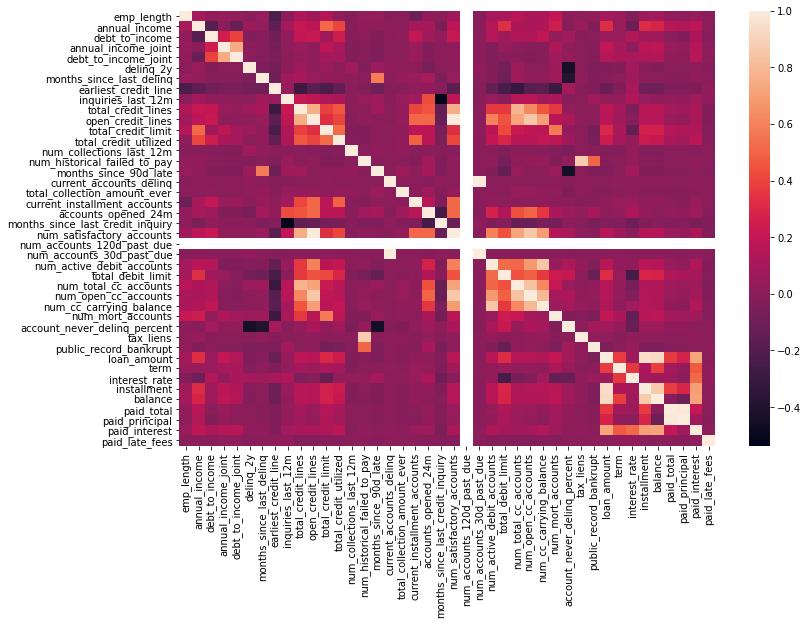

In [51]:
df2 = df1[['loan_amount','emp_length','annual_income','debt_to_income','earliest_credit_line','total_credit_lines',
           'total_credit_limit','total_credit_utilized','current_installment_accounts','interest_rate','open_credit_lines','installment']]

cor_mat1 = df1.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cor_mat1)
plt.show()


#### As you can see we have two heatmaps. The first heatmap (above) is showing all the columns from dataframe. data.corr() was used in the code to show the correlation between the values. You can see there is white line going through it which is showing correlation between same variable. 

As shown below is the heatmap with new dataframe df2 which is created from df1 with selected columns to see correlation of these column. I have used loan_amount as our target variable and compared it with other variables (emp_length, anual income etc.)to see how these varibales affect the loan amount. Looking at below heatmap lighter color shows positive corelation with target variable whereas darker color shows negative corelation. As you can see from heatmap only earliest credit line has negative corelation with loan amount which means person with earliest credit line tend to borrow less amount and person with shorter credit line history tend to borrow more money. all other varibles are very little positively corelated to loan amount. that means they all increaing slightly with increase of loan amount.

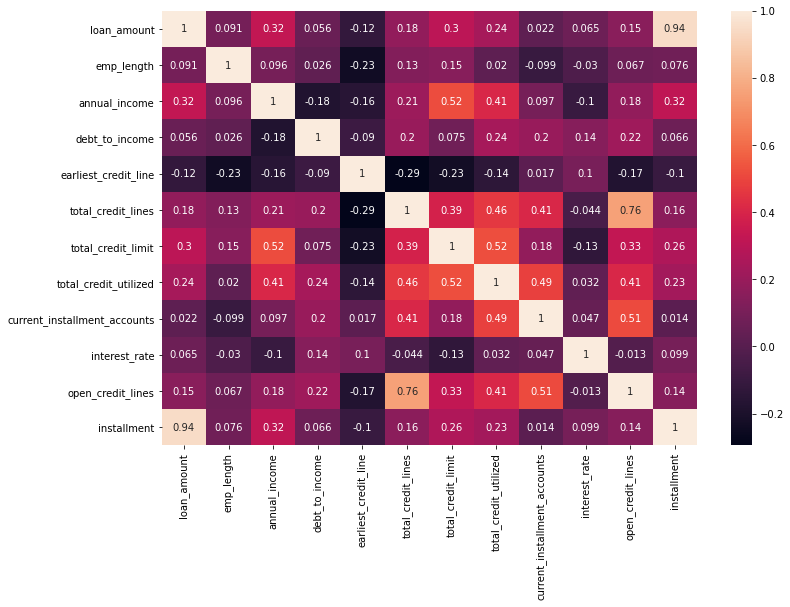

In [49]:
df2 = df1[['loan_amount','emp_length','annual_income','debt_to_income','earliest_credit_line','total_credit_lines',
           'total_credit_limit','total_credit_utilized','current_installment_accounts','interest_rate','open_credit_lines','installment']]


cor_mat2 = df2.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cor_mat2,annot=True)
plt.show()



### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 



Text(0, 0.5, 'Counts')

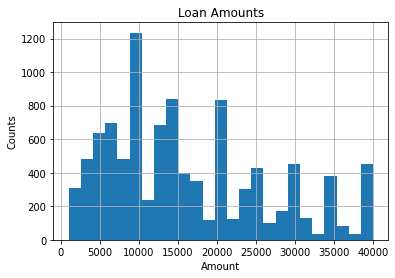

In [25]:
df1['loan_amount'].plot.hist(grid=True, bins=25)
plt.title('Loan Amounts')
plt.xlabel('Amount')
plt.ylabel('Counts')

# If you look at the graph below then you notice that the graph is little right skewed. 
# the highest bin value is close to 1250 and lowest bin value is around 40.
# As you can see we have bin size 25 which is according to me right size because you can see all the bins with some data.
# If we go higher in the bin size then bin width gets slimer and sometimes you have some empty bins
# which is not useful, in other words,
# some bins does not have data in it because of wider range of bin size.

### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
a.	Is there a better way to do this than with a lambda? 

b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


In [26]:
# created a dictionary with all states and region v
regions = {'WA':'Pacific','ID':'Pacific','OR': 'Pacific','CA': 'Pacific','NV': 'Pacific','UT': 'Pacific','AZ': 'Pacific','AK':'Pacific',
           'HI': 'Pacific','MT': 'Plains','ND': 'Plains','WY': 'Plains','SD': 'Plains','NE': 'Plains','CO': 'Plains','KS': 'Plains',
           'NM': 'Plains','TX': 'Plains','OK': 'Plains','AR': 'South','TN': 'South','NC': 'South','LA': 'South','MS': 'South',
           'AL': 'South','SC': 'South','GA': 'South','FL': 'South','PR':'South','ME':'Northeast','VT': 'Northeast','NH': 'Northeast',
           'CT': 'Northeast','MA': 'Northeast','RI': 'Northeast','NY': 'Northeast','NJ': 'Northeast','PA': 'Northeast','WV': 'Northeast',
           'VA': 'Northeast','MD': 'Northeast','DE': 'Northeast','DC': 'Northeast','MO': 'Midwest','IA': 'Midwest','MN':'Midwest',
           'WI': 'Midwest','IL': 'Midwest','KY': 'Midwest','IN': 'Midwest','MI': 'Midwest','OH': 'Midwest'}

print(time.perf_counter())

df1['region'] = df1['state'].map(lambda x:  regions[x] )

print(time.perf_counter())
      
df1

1128.689479
1128.6958207


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0.0,NaN,0.00,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0.0,NaN,0.00,0,0.0,1996,1,30,14,28800,4321,0,1,0.0,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0.0,NaN,0.00,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0.0,NaN,0.00,0,0.0,2007,0,4,4,25400,4997,0,1,0.0,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,0.0,2008,7,22,16,69839,52722,0,0,0.0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0.0,NaN,0.00,0,0.0,2008,5,44,13,199195,77963,0,1,0.0,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,Plains
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,0.0,NaN,0.00,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,Northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,0,0.0,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,Northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0.0,NaN,0.00,0,0.0,1999,1,38,15,294475,27641,0,0,0.0,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,Midwest


### 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

Text(0.5, 1.0, 'All Region')

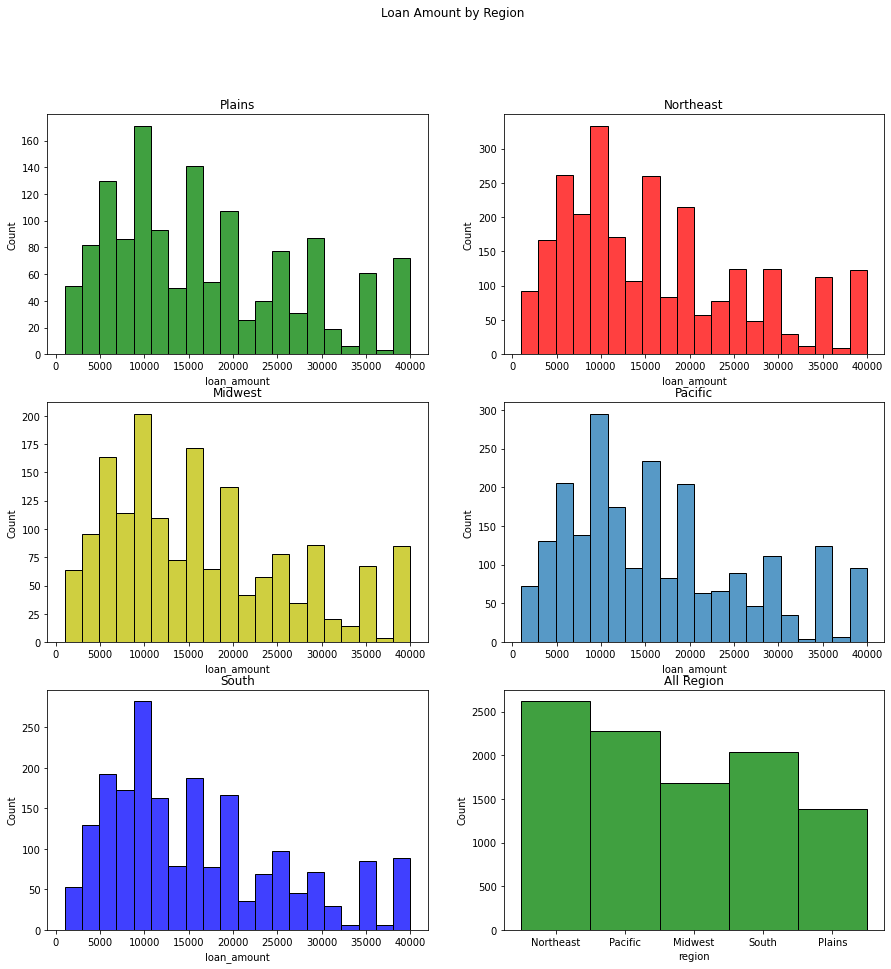

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Loan Amount by Region')


# Northeast region
sns.histplot(ax=axes[0,1], data = df1[df1['region'] == 'Northeast']['loan_amount'], bins=20, color='r')
axes[0,1].set_title('Northeast')

# Plains region
sns.histplot(ax=axes[0,0], data = df1[df1['region'] == 'Plains']['loan_amount'], bins=20, color='g')
axes[0,0].set_title('Plains')

# Midwest region
sns.histplot(ax=axes[1,0], data = df1[df1['region'] == 'Midwest']['loan_amount'], bins=20 , color = 'y')
axes[1,0].set_title('Midwest')

# South region
sns.histplot(ax=axes[2,0], data = df1[df1['region'] == 'South']['loan_amount'], bins=20, color = 'b')
axes[2,0].set_title('South')

# Pacific region
sns.histplot(ax=axes[1,1], data = df1[df1['region'] == 'Pacific']['loan_amount'], bins=20)
axes[1,1].set_title('Pacific')

# All region
sns.histplot(ax=axes[2,1], data = df1['region'], bins=20, color = 'g')
axes[2,1].set_title('All Region')


# you can see subplots for all 5 region and for empty subplot I just put all region graph just to compare some data for 
# all region.
# As you can see from all subplots for region data is little right skewed with very similar pattern for region.
# As you can see the highest value occurs at 10000 loan amount for every region and lowest can be found around
# 33000 and at 37000.
# mean and median for these graphs should also be around 10000-15000 range. 
# from these graphs we can see that more people tend to borrow in rnage of 3000-20000. And fewer people borrow beyond 20000
# compared to previous range with some pick at around 35000 and 40000. 
